In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

In [2]:
%matplotlib inline

In [3]:
data = pd.read_excel('../data/Supplementary_Data_Microprocessors.xls',header=1)

In [4]:
data1 = data[[u'Chip', u'f', u'V',u'P',u'lambda',u'N',u'Achip']]

In [5]:
data2 = data[[u'Chip.1', u'f.1', u'V.1', u'P.1',u'lambda.1', u'N.1', u'Achip.1']]

In [6]:
for c in data2.columns:
    name = c.split('.')[0]
    data2.loc[:,name] = data2[c]
    del data2[c]

/nfs/adaptive/bedwards/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/nfs/adaptive/bedwards/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:499: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [7]:
df = pd.concat([data1,data2.dropna()])

In [8]:
df['constant']= np.ones(len(df))
df['f'] = df['f']*10**6
df['size'] = df['lambda']
del df['lambda']
df['N'] = df['N']*10**6

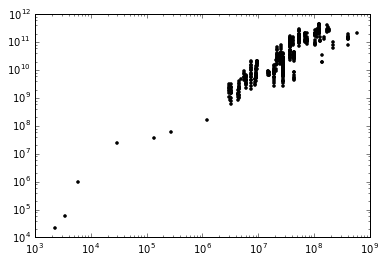

In [30]:
plt.loglog(df.N,df.P*df.f,'k.')

In [31]:
sm.GLS(np.log(df.P*df.f),df[['logN','constant']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            GLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     2497.
Date:                Fri, 20 Nov 2015   Prob (F-statistic):          7.34e-201
Time:                        16:11:57   Log-Likelihood:                -628.48
No. Observations:                 523   AIC:                             1261.
Df Residuals:                     521   BIC:                             1269.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
logN           1.2755      0.026     49.967      0.000         1.225     1.326
constant     -15.4787      0.790    -19.584      0.000       -17.031   -13.926
==============================================================================
Omnibus:                       37.039   Durbin-Watson:                   0.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.099
Skew:                          -0.694   Prob(JB):                     4.38e-10
Kurtosis:                       3.226   Cond. No.                         695.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
T = df.N*df.f

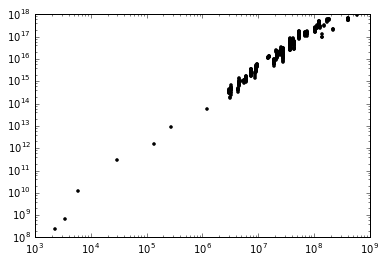

In [13]:
plt.loglog(df.N,T,'k.')

In [14]:
df['logN'] = np.log(df.N*10**6)

In [17]:
fit = sm.GLS(np.log(T),df[['logN','constant']]).fit()

In [18]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            GLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.633e+04
Date:                Fri, 20 Nov 2015   Prob (F-statistic):               0.00
Time:                        15:42:41   Log-Likelihood:                -311.64
No. Observations:                 523   AIC:                             627.3
Df Residuals:                     521   BIC:                             635.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
logN           1.7801      0.014    127.802      0.000         1.753     1.807
constant     -17.4688      0.431    -40.508      0.000       -18.316   -16.622
==============================================================================
Omnibus:                      116.519   Durbin-Watson:                   0.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.410
Skew:                          -1.177   Prob(JB):                     3.45e-56
Kurtosis:                       5.486   Cond. No.                         695.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

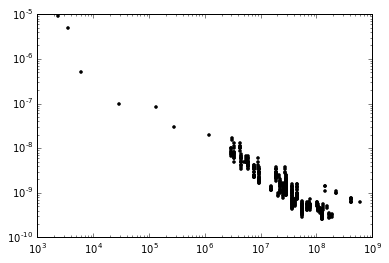

In [24]:
plt.loglog(df.N,1./df.f,'k.')

In [25]:
sm.GLS(np.log(1.0/df.f),df[['logN','constant']]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      f   R-squared:                       0.858
Model:                            GLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     3137.
Date:                Fri, 20 Nov 2015   Prob (F-statistic):          1.24e-222
Time:                        15:49:58   Log-Likelihood:                -311.64
No. Observations:                 523   AIC:                             627.3
Df Residuals:                     521   BIC:                             635.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
logN          -0.7801      0.014    -56.007      0.000        -0.807    -0.753
constant       3.6533      0.431      8.472      0.000         2.806     4.501
==============================================================================
Omnibus:                      116.519   Durbin-Watson:                   0.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.410
Skew:                           1.177   Prob(JB):                     3.45e-56
Kurtosis:                       5.486   Cond. No.                         695.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

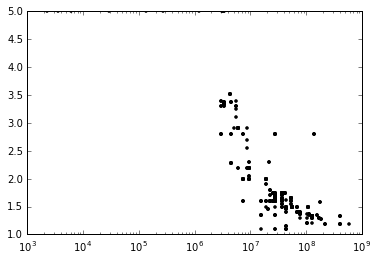

In [29]:
plt.semilogx(df.N,df.V,'k.')